<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/CS575_MidSem_solution/A2_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution for Dataset1

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#importing the dataset

D1 = pd.read_csv("Dataset1_global_mean_temp.csv", names = ["global_mean_temp"])
D1.head()

,global_mean_temp
0,-0.36
1,-0.30
2,-0.23
3,-0.23
4,-0.51


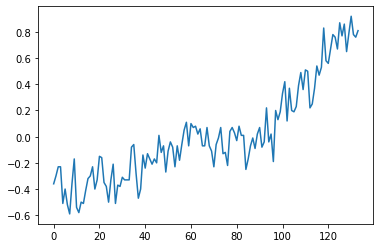

In [ ]:
plt.plot(D1['global_mean_temp'])

#KPSS Test

In [ ]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D1[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('global_mean_temp')

Results of KPSS Test for  global_mean_temp
Test Statistic            0.937789
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D1 , the value of the test statistic is greater than the critical value at all confidence intervals in the KPSS test, hence the series is non stationary.

#ADF Test

In [ ]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D1[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('global_mean_temp')

Results of Dickey-Fuller Test for  global_mean_temp 

Test Statistic                   0.330692
p-value                          0.978710
#Lags Used                       3.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


>For the given dataset D1 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, hence  the series is non stationary.

Note:  The signed values should be compared and not the absolute values.

**Since, both tests conclude that the series is non stationary, therefore, the dataset is concluded as Non Stationary.**

# making non stationary series to stationary

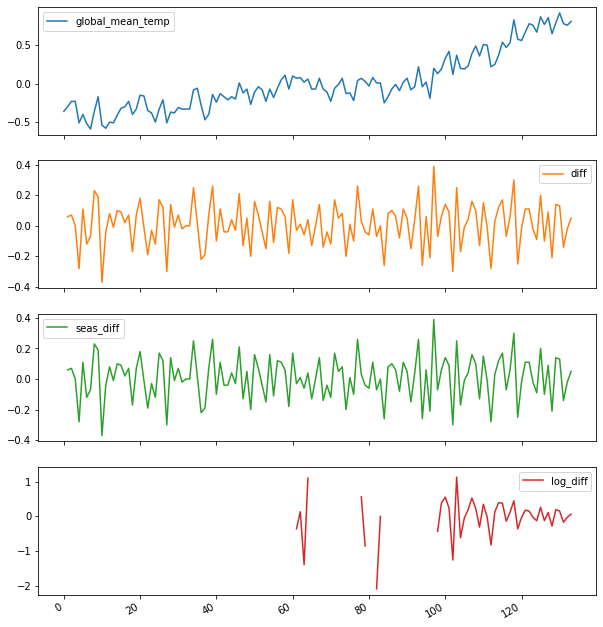

In [ ]:
# Differencing
D1['diff'] = D1['global_mean_temp'].diff(periods=1)

# Seasonal Differencing
D1['seas_diff'] = D1['global_mean_temp'].diff(periods=1)

# Transformation (here we use log transformation)
D1_log = np.log(D1['global_mean_temp'])
D1['log_diff'] = D1_log.diff(periods=1)

D1.plot(subplots=True, figsize=(10,12))
plt.show()



> From the above plot we can visiualise that coloumn seas_diff is stationary series




In [ ]:
data = D1['global_mean_temp']

#Single Exponential Smoothing

In [ ]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

In [ ]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [ ]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [ ]:
#Calculating mean absolute error function for single exponential smoothing 

def MAE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE


In [ ]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=2), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=4), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=12), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=24), "\n")

MSE for alpha =.4 is   0.01594797832968231 

MSE for alpha =.35 is  0.017698638391144723 

MSE for alpha =.65 is  0.01497395392622031 

MSE for alpha =.85 is  0.014159195861500922 

MSE for alpha =.65 is  0.018819568159627598 

MSE for alpha =.85 is  0.011645205444593028 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_SES(data, .4 ,interval=1), "\n")
print("MAE  is " ,MAE_SES(data, .4  ,interval=2), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=4), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=8), "\n")
print("MAE  is " ,MAE_SES(data,.4  ,interval=12), "\n")
print("MAE  is " ,MAE_SES(data,.4 ,interval=24), "\n")

MAE  is  0.10291313932665104 

MAE  is  0.10637972614055607 

MAE  is  0.09271043500911745 

MAE  is  0.08867317782053637 

MAE  is  0.1535611716437333 

MAE  is  0.16380213333333335 



#Double Exponential Smoothing

In [ ]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [ ]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for double exponential smoothing 

def MAE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=2), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=4), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=8), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=12), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=24), "\n")


MSE for alpha =.4,  beta = .2  is  0.017536076618427186 

MSE for alpha =.35, beta = .5  is  0.021648531011961007 

MSE for alpha =.85, beta = .6  is  0.03963367220293091 

MSE for alpha =.45, beta = .6  is  0.03328364702784446 

MSE for alpha =.7,  beta = .55 is  0.0799888391964689 

MSE for alpha =.2,  beta = .6  is  0.11075664448712613 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=1), "\n")
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=2), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=4), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=8), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=12), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=24), "\n")

MAE  is  0.10723459437143268 

MAE  is  0.11099978603732098 

MAE  is  0.11605706147912483 

MAE  is  0.142977259857898 

MAE  is  0.22733483103966637 

MAE  is  0.24641766355087716 



#Triple Exponential Smoothing

In [ ]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [ ]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for Triple exponential smoothing 

def MAE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,1, .35, .5, .3, interval=2), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,1, .45, .6, .4 ,interval=4), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=12), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=24), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  0.0016837110579346422 

MSE for alpha =.35, beta = .5,  gamma = .3  is  0.005265628189404686 

MSE for alpha =.45, beta = .6,  gamma = .4  is  0.005253355402164649 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  0.0013929225270934648 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  0.011310483442402255 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  0.01768535224223506 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=2), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=4), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=12), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=24), "\n")

MAE  is  0.03188115714914041 

MAE  is  0.04864154539895381 

MAE  is  0.06454839664207113 

MAE  is  0.031539601580397536 

MAE  is  0.10338742679746389 

MAE  is  0.14758751653333338 



# AR

In [ ]:
#fit model
model=ARIMA(D1['seas_diff'].dropna(), order=(2,0,0))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D1['forecast1'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:              seas_diff   No. Observations:                  133
Model:                     ARMA(1, 0)   Log Likelihood                  78.323
Method:                       css-mle   S.D. of innovations              0.134
Date:                Mon, 01 Mar 2021   AIC                           -150.647
Time:                        05:06:18   BIC                           -141.975
Sample:                             0   HQIC                          -147.123
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0086      0.009      0.977      0.329      -0.009       0.026
ar.L1.seas_diff    -0.3198      0.082     -3.910      0.000      -0.480      -0.160
                                

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D1['seas_diff'],D1['forecast1'])).mean() 
print("MSE for AR is", MSE)

MSE for AR is 0.018018270962289987


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D1['seas_diff'],D1['forecast1'])).mean() 
print("MAE for AR is", MAE)


MAE for AR is 0.10783827755540124


# MA

In [ ]:
#fit model
model=ARIMA(D1['seas_diff'].dropna(), order=(2,0,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D1['forecast2'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:              seas_diff   No. Observations:                  133
Model:                     ARMA(0, 1)   Log Likelihood                  88.320
Method:                       css-mle   S.D. of innovations              0.124
Date:                Mon, 01 Mar 2021   AIC                           -170.641
Time:                        05:06:18   BIC                           -161.969
Sample:                             0   HQIC                          -167.117
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0088      0.003      2.576      0.010       0.002       0.016
ma.L1.seas_diff    -0.6882      0.073     -9.471      0.000      -0.831      -0.546
                                

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D1['seas_diff'],D1['forecast2'])).mean() 
print("MSE for MR is", MSE)

MSE for MR is 0.015471073328011089


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D1['seas_diff'],D1['forecast2'])).mean() 
print("MAE for MR is", MAE)


MAE for MR is 0.10012759157368091


# ARIMA

In [ ]:
#fit model
model=ARIMA(D1['global_mean_temp'].dropna(), order=(2,1,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D1['forecast3'] = model_fit.predict()

                             ARIMA Model Results                              
Dep. Variable:     D.global_mean_temp   No. Observations:                  133
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  90.331
Method:                       css-mle   S.D. of innovations              0.122
Date:                Mon, 01 Mar 2021   AIC                           -172.662
Time:                        05:06:19   BIC                           -161.101
Sample:                             1   HQIC                          -167.964
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0090      0.003      3.076      0.002       0.003       0.015
ar.L1.D.global_mean_temp     0.2267      0.111      2.033      0.042       0.008       0.

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D1['seas_diff'],D1['forecast3'])).mean() 
print("MSE for ARIMA is", MSE)

MSE for ARIMA is 0.015121154549546795


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D1['seas_diff'],D1['forecast3'])).mean() 
print("MAE for ARIMA is", MAE)


MAE for ARIMA is 0.0985452056002884


# Optimal model check by auto arima

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
model = pm.auto_arima(D1.iloc[:,0], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-172.662, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-138.203, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-150.647, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-170.641, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-139.692, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-171.777, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-171.188, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-173.183, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-171.195, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-172.644, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-168.699, Time=0.06 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.059 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

so best optimal model is ARIMA(0,1,2)

# table

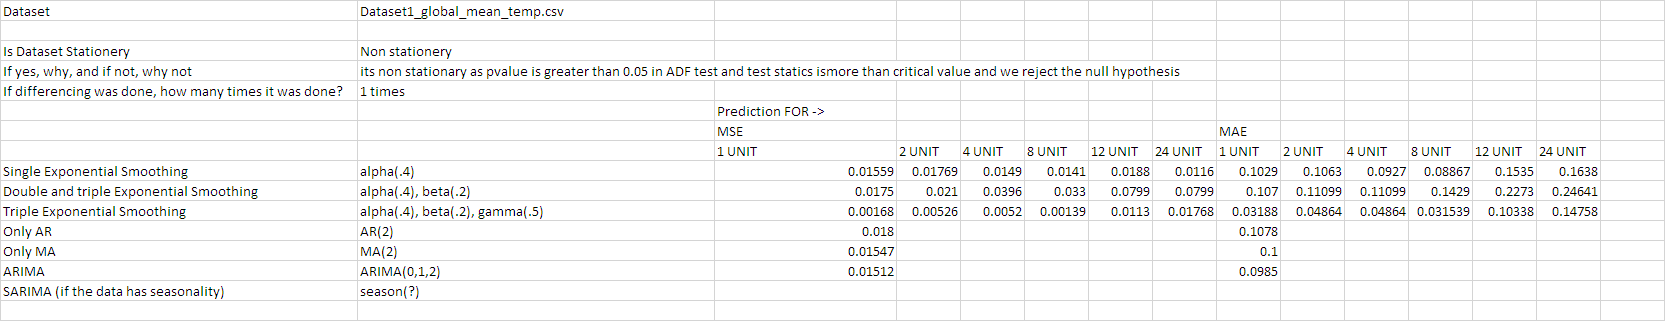